# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [ ]:
!python -m pip install kaggle==1.6.12

In [ ]:
!pip install --target=/workspace ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt

In [ ]:
!pip uninstall numpy -y
#!pip install numpy==1.21.6

In [ ]:
!pip uninstall numpy seaborn scipy -y

In [ ]:
!pip install --force-reinstall matplotlib

In [ ]:
!pip install matplotlib

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

I aim to investigate how weather conditions affect bike riding behavior in New York City in 2016 from the beginning of January until the end of June. I will use two datasets: one containing bike ride data taken from Citibike website https://citibikenyc.com/system-data and the other containing weather data taken from github which was originally found in kaggle https://www.kaggle.com/datasets/eaturner/nycweather/data

Bike Ride Data (Citibike) covers the period from January to June 2016, aligning with your investigation period of interest. 
Weather data covers January to June 2016, matching the timeframe of your bike ride data. It provides a structured dataset suitable for correlating weather variables with bike riding behavior.

By combining these datasets, we can analyze how variations in weather conditions such as temperature, precipitation, and snow influence bike ride patterns in New York City during the specified months period. This analysis can uncover insights into how weather impacts bike usage, helping to inform transportation policies and bike-sharing system management.

For these chosen datasets and after many researches and in order to narrow the study to these selected months each dataset is bounded to this months durations and since they are large, I randomly narrowed down the number of data to avoid any kernel crashes. 

#### **Dataset 1**

The weather dataset from kaggle downloaded from github URL which contains a subset of information, pertaining to the weather patterns during Januaray 2016 - June 2016 in NYC

Type: CSV file 

Method: The dataset was programatically loaded from github using the saved URL of the raw data using requests and os libraries. 

Dataset variables:
1- Date: the date of the weather YYYYMMDD.
2- Latitude: the latitude coordinate of the weather station where the data was recorded.
3- Longitude: the longitude coordinate of the weather station where the data was recorded.
4- Snow: amount of snowfall recorded on that date.
5- PRCP: amount of precipitation recorded on the given date.
6- SNWD: depth of snow on the ground.
7- TAVG: average temperature for the day.
8- TMAX: maximum temperature recorded on the given date.
9- TMIN: minimum temperature recorded on the given date.

In [2]:
#First dataset is from a url saved in my github repository which includes the weather in New York Citry for the years 2016 and 2017 
#I programatically loaded the dataset 
url = 'https://raw.githubusercontent.com/ChristinaNSaba/dataanalysis/fc795c2aa5588dad5106c9f64d7f4c1a6b85f48e/nyc_Jan_Jun_2016_weat.csv'
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Define file path
file_path = os.path.join(folder_name, 'nyc_Jan_Jun_2016_weat.csv')

# Download the file
response = requests.get(url)
response.raise_for_status()

# Save the file
with open(file_path, mode='wb') as file:
    file.write(response.content)

# Read the file using pandas
original_weather_df = pd.read_csv(file_path)
weather_df = original_weather_df.copy()
print(weather_df)

           DATE  LATITUDE  LONGITUDE    SNOW  PRCP    SNWD  TAVG  TMAX  TMIN
0      20160101  41.06390  -73.77220     0.0  0.00 -9999.0 -9999 -9999 -9999
1      20160102  41.06390  -73.77220     0.0  0.00 -9999.0 -9999 -9999 -9999
2      20160103  41.06390  -73.77220     0.0  0.00 -9999.0 -9999 -9999 -9999
3      20160104  41.06390  -73.77220     0.0  0.00 -9999.0 -9999 -9999 -9999
4      20160105  41.06390  -73.77220     0.0  0.00 -9999.0 -9999 -9999 -9999
...         ...       ...        ...     ...   ...     ...   ...   ...   ...
32202  20170709  40.73417  -73.41694 -9999.0  0.00 -9999.0 -9999    82    67
32203  20170710  40.73417  -73.41694 -9999.0  0.00 -9999.0 -9999    81    64
32204  20170711  40.73417  -73.41694 -9999.0  0.06 -9999.0 -9999    86    74
32205  20170712  40.73417  -73.41694 -9999.0  0.00 -9999.0 -9999    90    74
32206  20170713  40.73417  -73.41694 -9999.0  0.01 -9999.0 -9999    91    68

[32207 rows x 9 columns]


In [3]:
original_weather_df.to_csv('original_weather_df.csv', index=False)

In [4]:
weather_df.dtypes

DATE           int64
LATITUDE     float64
LONGITUDE    float64
SNOW         float64
PRCP         float64
SNWD         float64
TAVG           int64
TMAX           int64
TMIN           int64
dtype: object

In [5]:
samples = weather_df.sample(n=10)
print(samples)

           DATE  LATITUDE  LONGITUDE    SNOW  PRCP    SNWD  TAVG  TMAX  TMIN
25837  20160603  40.95110  -74.11830 -9999.0  0.02 -9999.0 -9999 -9999 -9999
25924  20160910  40.95110  -74.11830 -9999.0  0.33 -9999.0 -9999 -9999 -9999
17855  20161110  41.04440  -74.29330     0.0  0.20     0.0 -9999 -9999 -9999
836    20170503  41.01910  -74.23340 -9999.0  0.00 -9999.0 -9999 -9999 -9999
24821  20161111  40.74360  -74.35390     0.0  0.00     0.0 -9999    64    38
29887  20170524  40.30340  -74.04000 -9999.0  0.01 -9999.0 -9999 -9999 -9999
4023   20160630  40.57590  -74.28470     0.0  0.00 -9999.0 -9999 -9999 -9999
31263  20160624  40.87639  -74.28306 -9999.0  0.00 -9999.0 -9999    84    63
2157   20160509  40.95190  -74.15770 -9999.0  0.25 -9999.0 -9999 -9999 -9999
3446   20170511  40.29700  -74.00150 -9999.0  0.00 -9999.0 -9999 -9999 -9999


In [6]:
#now in order to filter the data and only get the needed values we need to change the data type to date
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'], format='%Y%m%d')
weather_df['DATE'].head(5)

# Filter for dates between January and June 2016
start_date = '2016-01-01'
end_date = '2016-06-30'
mask = (weather_df['DATE'] >= start_date) &  (weather_df['DATE'] <= end_date)
filtered_weather_df = weather_df.loc[mask]

print("Filtered Weather DataFrame:")
print(filtered_weather_df.head())
filtered_weather_df.sample(n=10, random_state=1)

filtered_weather_df = filtered_weather_df.copy()
filtered_weather_df.info()

Filtered Weather DataFrame:
        DATE  LATITUDE  LONGITUDE  SNOW  PRCP    SNWD  TAVG  TMAX  TMIN
0 2016-01-01   41.0639   -73.7722   0.0   0.0 -9999.0 -9999 -9999 -9999
1 2016-01-02   41.0639   -73.7722   0.0   0.0 -9999.0 -9999 -9999 -9999
2 2016-01-03   41.0639   -73.7722   0.0   0.0 -9999.0 -9999 -9999 -9999
3 2016-01-04   41.0639   -73.7722   0.0   0.0 -9999.0 -9999 -9999 -9999
4 2016-01-05   41.0639   -73.7722   0.0   0.0 -9999.0 -9999 -9999 -9999
<class 'pandas.core.frame.DataFrame'>
Index: 10985 entries, 0 to 31828
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       10985 non-null  datetime64[ns]
 1   LATITUDE   10985 non-null  float64       
 2   LONGITUDE  10985 non-null  float64       
 3   SNOW       10985 non-null  float64       
 4   PRCP       10985 non-null  float64       
 5   SNWD       10985 non-null  float64       
 6   TAVG       10985 non-null  int64         
 7   TMAX     

In [7]:
#Check for missing values
missing_values = filtered_weather_df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

#Check for duplicate rows
duplicate_rows = filtered_weather_df.duplicated().sum()
print("Number of Duplicate Rows:")
print(duplicate_rows)

#Check data types
data_types = filtered_weather_df.dtypes
print("Data Types of Each Column:")
print(data_types)

description = filtered_weather_df.describe()
print(description)
print("\n")
print("\n")

Missing Values in Each Column:
DATE         0
LATITUDE     0
LONGITUDE    0
SNOW         0
PRCP         0
SNWD         0
TAVG         0
TMAX         0
TMIN         0
dtype: int64
Number of Duplicate Rows:
0
Data Types of Each Column:
DATE         datetime64[ns]
LATITUDE            float64
LONGITUDE           float64
SNOW                float64
PRCP                float64
SNWD                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
                                DATE      LATITUDE     LONGITUDE  \
count                          10985  10985.000000  10985.000000   
mean   2016-03-31 04:25:11.442876672     40.757556    -74.116415   
min              2016-01-01 00:00:00     40.275400    -74.482700   
25%              2016-02-15 00:00:00     40.662300    -74.284700   
50%              2016-04-01 00:00:00     40.755600    -74.152300   
75%              2016-05-15 00:00:00     40.909600    -74.000200   
max              2016-06

#### Dataset 2

Type: CSV files

Method: The csv files are downloaded manually to jupyter and I read them using read_csv from pandas, there are 6 datasets indicating each month for the bike riding then concatenated.

Dataset variables:

1- Tripduration: The duration of the trip in seconds.
2- Starttime: The date and time when the trip started formatted as MM/DD/YYYY HH:MM:SS together.
3- Stoptime: The date and time when the trip ended formatted as MM/DD/YYYY HH:MM:SS together.
4- Start station id: The station where the trip started.
5- Start station name: Name of the station where the trip started.
6- Start station latitude: The latitude coordinate of the start station.
7- Start station longitude: The longitude coordinate of the start station.
8- End station id: ID of the station where the trip ended.
9- End station name: The name of the station where the trip ended.
10- End station latitude: The latitude coordinate of the end station.
11- End station longitude: The longitude coordinate of the end station.
12- Bikeid: The unique identifier for the bike used in the trip.
13- User Type: Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member. 
14- Birth year: The birth year of the user.
15- Gender: The gender of the user 0 for unknown, 1 for male, and 2 for female.

In [8]:
#These datasets here are all related to the bike riding in New York City in each month from january to june in 2016 
#They are downloaded manually and concatenated to be cleaned and analyzed
#Since they are huge they are randomly narrowed to obtain 500 data from each month
file_paths = [
    '201601-citibike-tripdata_1.csv',
    '201602-citibike-tripdata_1.csv',
    '201603-citibike-tripdata_1.csv',
    '201604-citibike-tripdata_1.csv',
    '201605-citibike-tripdata_1.csv',
    '201606-citibike-tripdata_1.csv'
]

# Read and sample 500 rows from each file
sampled_dfs = []
for file in file_paths:
    df = pd.read_csv(file)
    sampled_df = df.sample(n=500, random_state=42)
    sampled_dfs.append(sampled_df)

# Concatenate the sampled DataFrames
bikeshare_df = pd.concat(sampled_dfs, ignore_index=True)

bikeshare = bikeshare_df.copy()
bikeshare.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,511,1/30/2016 10:08:53,1/30/2016 10:17:25,449.0,W 52 St & 9 Ave,40.764618,-73.987895,446.0,W 24 St & 7 Ave,40.744876,-73.995299,24138.0,Subscriber,1990.0,1.0
1,208,1/9/2016 12:00:13,1/9/2016 12:03:41,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,301.0,E 2 St & Avenue B,40.722174,-73.983688,22623.0,Subscriber,1967.0,1.0
2,1047,1/9/2016 12:51:35,1/9/2016 13:09:03,449.0,W 52 St & 9 Ave,40.764618,-73.987895,487.0,E 20 St & FDR Drive,40.733143,-73.975739,20346.0,Subscriber,1988.0,1.0
3,413,1/3/2016 21:26:44,1/3/2016 21:33:38,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,397.0,Fulton St & Clermont Ave,40.684157,-73.969223,17279.0,Subscriber,1986.0,1.0
4,1946,1/6/2016 19:43:00,1/6/2016 20:15:26,241.0,DeKalb Ave & S Portland Ave,40.689810,-73.974931,3002.0,South End Ave & Liberty St,40.711512,-74.015756,21162.0,Subscriber,1994.0,2.0
5,876,1/15/2016 08:55:53,1/15/2016 09:10:30,510.0,W 51 St & 6 Ave,40.760660,-73.980420,528.0,2 Ave & E 31 St,40.742909,-73.977061,15974.0,Subscriber,1961.0,1.0
6,430,1/11/2016 18:14:59,1/11/2016 18:22:10,523.0,W 38 St & 8 Ave,40.754666,-73.991382,517.0,Pershing Square South,40.751581,-73.977910,15741.0,Subscriber,1968.0,1.0
7,592,1/6/2016 08:37:19,1/6/2016 08:47:11,3002.0,South End Ave & Liberty St,40.711512,-74.015756,427.0,Bus Slip & State St,40.701907,-74.013942,22399.0,Subscriber,1966.0,1.0
8,580,1/20/2016 18:50:09,1/20/2016 18:59:49,168.0,W 18 St & 6 Ave,40.739713,-73.994564,523.0,W 38 St & 8 Ave,40.754666,-73.991382,18123.0,Subscriber,1975.0,1.0
9,734,1/7/2016 15:33:58,1/7/2016 15:46:12,401.0,Allen St & Rivington St,40.720196,-73.989978,346.0,Bank St & Hudson St,40.736529,-74.006180,22753.0,Subscriber,1980.0,2.0


In [9]:
bikeshare_df.to_csv('bikeshare_df.csv', index=False)

In [10]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             3000 non-null   int64  
 1   starttime                3000 non-null   object 
 2   stoptime                 3000 non-null   object 
 3   start station id         3000 non-null   float64
 4   start station name       3000 non-null   object 
 5   start station latitude   3000 non-null   float64
 6   start station longitude  3000 non-null   float64
 7   end station id           3000 non-null   float64
 8   end station name         3000 non-null   object 
 9   end station latitude     3000 non-null   float64
 10  end station longitude    3000 non-null   float64
 11  bikeid                   3000 non-null   float64
 12  usertype                 3000 non-null   object 
 13  birth year               2687 non-null   float64
 14  gender                  

In [11]:
# Check for duplicates
print("Duplicates:", bikeshare.duplicated().sum())

print(bikeshare.describe())

print("\nUnique Values of Bikeshare dataset:")
print(bikeshare['usertype'].value_counts())

#birth year unrealistic values
print("\nBirth Year Value Counts:")
print(bikeshare['birth year'].value_counts())

Duplicates: 0
       tripduration  start station id  start station latitude  \
count  3.000000e+03       3000.000000             3000.000000   
mean   1.873686e+03        883.240667               40.737691   
std    5.339125e+04       1037.988428                0.021871   
min    6.100000e+01         72.000000               40.680342   
25%    3.670000e+02        329.000000               40.722055   
50%    5.890000e+02        450.000000               40.739126   
75%    9.655000e+02        523.000000               40.752263   
max    2.921865e+06       3255.000000               40.787209   

       start station longitude  end station id  end station latitude  \
count              3000.000000     3000.000000           3000.000000   
mean                -73.987040      901.518333             40.737552   
std                   0.015717     1059.878240              0.021999   
min                 -74.017134       72.000000             40.678907   
25%                 -73.998102      330.

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [ ]:
original_weather_df #original weather dataset
bikeshare_df #original bike dataset

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [ ]:
#Completeness issue in bikeshare dataset
#The attribute birth_year seems to have a set of null values 

Null Birth years sum =  313


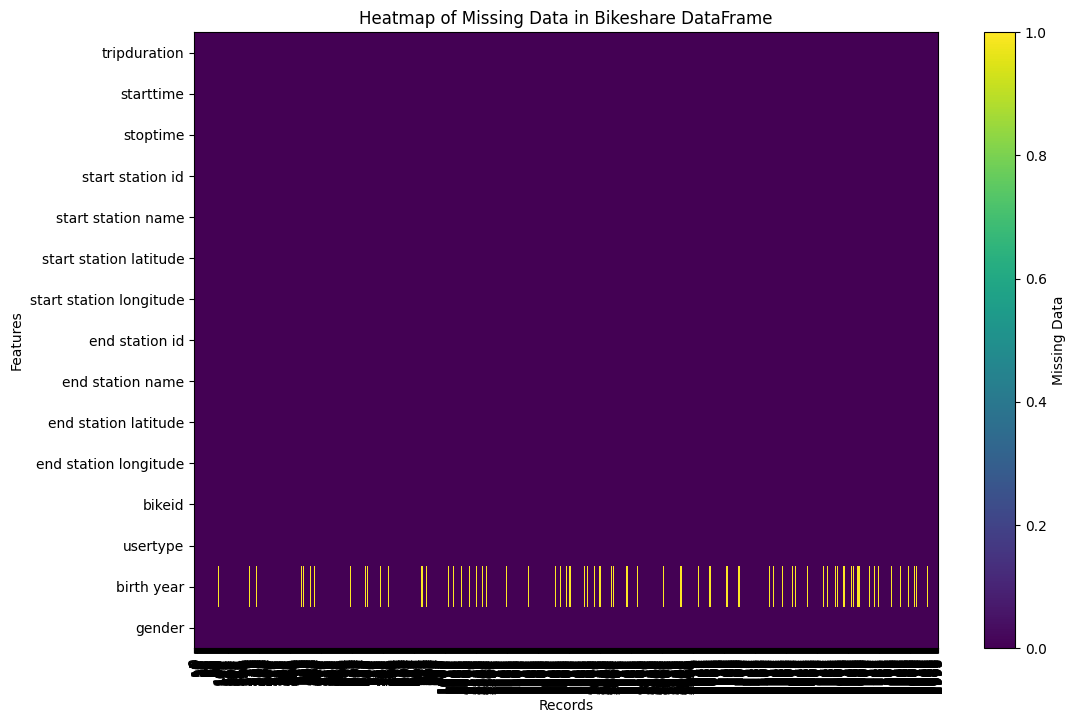

In [12]:
birth_year_null = bikeshare['birth year'].isnull().sum()
print("Null Birth years sum = ", birth_year_null)

bikeshare.isnull().sum()

# Visualize the null values in the bikeshare dataframe
plt.figure(figsize=(12, 8))
missing_data = bikeshare.isna().transpose()
plt.imshow(missing_data, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Missing Data')
plt.yticks(ticks=np.arange(len(missing_data.index)), labels=missing_data.index)
plt.xticks(ticks=np.arange(len(missing_data.columns)), labels=missing_data.columns, rotation=90)
plt.title('Heatmap of Missing Data in Bikeshare DataFrame')
plt.xlabel('Records')
plt.ylabel('Features')
plt.show()

Issue and justification: This completeness issue is detected programatically and visually where there are no null values but only in birth year attribute.

### Quality Issue 2:

From the statistics below there are many null values in weather dataset viewed as -9999 in columns TMIN TAVG SNWD and TMAX which are almost equal to the whole count of the dataset
We need to drop them
PRCP attribute has only 58 values, and Snow attribute has 4164 it is up to trial to check if it can be working if the null values shown as -9999 can be removed and not affect the whole data or replace with 0 indicating no snow and no percipitation.

In [13]:
print("\nStudy the -9999 values in different columns")
print("\n")

print((filtered_weather_df['TMAX'].describe()))
print("TMAX -9999 count = ", (filtered_weather_df['TMAX'] == -9999).sum())
print("\n")
print((filtered_weather_df['SNOW'].describe()))
print("SNOW -9999.0 count = ", (filtered_weather_df['SNOW'] == -9999.0).sum())
print("\n")
print((filtered_weather_df['TAVG'].describe()))
print("TAVG -9999.0 count = ", (filtered_weather_df['TAVG'] == -9999.0).sum())
print("\n")
print((filtered_weather_df['TMIN'].describe()))
print("TMIN -9999.0 count = ", (filtered_weather_df['TMIN'] == -9999.0).sum())
print("\n")
print((filtered_weather_df['SNWD'].describe()))
print("SNWD -9999.0 count = ", (filtered_weather_df['SNWD'] == -9999.0).sum())
print("\n")
print((filtered_weather_df['PRCP'].describe()))
print("PRCP -9999.0 count = ", (filtered_weather_df['PRCP'] == -9999.0).sum())
filtered_weather_df['PRCP'].value_counts()



Study the -9999 values in different columns


count    10985.000000
mean     -7792.448066
std       4162.395032
min      -9999.000000
25%      -9999.000000
50%      -9999.000000
75%      -9999.000000
max         96.000000
Name: TMAX, dtype: float64
TMAX -9999 count =  8575


count    10985.000000
mean     -3790.130232
std       4851.361837
min      -9999.000000
25%      -9999.000000
50%          0.000000
75%          0.000000
max         30.300000
Name: SNOW, dtype: float64
SNOW -9999.0 count =  4164


count    10985.000000
mean     -9499.465089
std       2184.335172
min      -9999.000000
25%      -9999.000000
50%      -9999.000000
75%      -9999.000000
max         82.000000
Name: TAVG, dtype: float64
TAVG -9999.0 count =  10439


count    10985.000000
mean     -7787.317706
std       4161.013836
min      -9999.000000
25%      -9999.000000
50%      -9999.000000
75%      -9999.000000
max         73.000000
Name: TMIN, dtype: float64
TMIN -9999.0 count =  8565


count    10985.000000
mean

PRCP
0.00    6899
0.01     397
0.02     311
0.03     209
0.04     196
        ... 
1.56       1
1.92       1
1.43       1
1.72       1
2.80       1
Name: count, Length: 216, dtype: int64

### Tidiness Issue 1:

In [ ]:
#Bikeshare dataset has values with inefficient datatypes like the dates and birth_year
#as seen below 
#starttime                   object
#stoptime                    object
#birth year                 float64

In [14]:
bikeshare.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                     float64
usertype                    object
birth year                 float64
gender                     float64
dtype: object

Issue and justification: The datatypes are not logically consistent, the start and stop time need to be changed to date, and the birth year is found to be float which is wrong and needs to be changed. 

### Tidiness Issue 2:

When studying the bikeshare dataset, it is occured that in dataset bikeshare the columns starttime and stoptime include multiple values where the date and the time are both within the same columns cell. 

In [15]:
bikeshare[['starttime', 'stoptime']]

,starttime,stoptime
0,1/30/2016 10:08:53,1/30/2016 10:17:25
1,1/9/2016 12:00:13,1/9/2016 12:03:41
2,1/9/2016 12:51:35,1/9/2016 13:09:03
3,1/3/2016 21:26:44,1/3/2016 21:33:38
4,1/6/2016 19:43:00,1/6/2016 20:15:26
...,...,...
2995,6/17/2016 19:04:09,6/17/2016 19:09:59
2996,6/7/2016 06:47:41,6/7/2016 06:51:00
2997,6/17/2016 07:12:02,6/17/2016 07:23:55
2998,6/4/2016 13:36:18,6/4/2016 13:47:29


Issue and justification: From the above table, we can see that there are two values date and time within the same column and that can cause consistency issues in terms of studying the date only and merging with the other dataset. 

### Tidiness Issue 3: 

Column names should be in a consistent format. in bikeshare dataset the columns names are not all in the standard format
We can see that some are written like "start station id" and some are like starttime they need to have the same when '_' in between

In [16]:
print(bikeshare_df.columns)

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')


Issue and justification: As seen from the above cells, there can be some misunderstanding in the naming of the columns of the dataset which some are written with spaces and others without which can cause error. It is best to change all of them to a standirized format. 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### **Quality Issue 1: FILL IN**

PS: When trying to drop the null birth year values, it was seen that all the users of user type customer were associated with null birth year maybe as a result of not being regulars or subscribers and their birth year data has not been saved.
This removal of the null birth years can negatively affect the data and the analysis of bicycle ridings and weather since the user_types are also studied.
It is better to drop the birth year column since this column is not used in the first place. This way the data is not biased towards one type and can be correctly studied.

We can see here from analyzing the dataset bikeshare that the user type customer birth year is only NaN and if it is removed then the user type is biased only with the subscribers which can affect the analysis quality. 

In [17]:
bikeshare_df #original bike rides dataset
original_weather_df #original weather dataset

bikeshare_df.sample(n=30)
(bikeshare_df['usertype'] == 'Customer').sum()
bikeshare_df[bikeshare_df['usertype'] == 'Customer'].sample(n=10)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
2137,1900,5/19/2016 09:24:05,5/19/2016 09:55:45,486.0,Broadway & W 29 St,40.746201,-73.988557,3145.0,E 84 St & Park Ave,40.778627,-73.957721,15989.0,Customer,NaN,0.0
1662,1656,4/10/2016 10:02:02,4/10/2016 10:29:38,3100.0,Nassau Ave & Newell St,40.724813,-73.947526,241.0,DeKalb Ave & S Portland Ave,40.689810,-73.974931,15774.0,Customer,NaN,0.0
2195,622,5/17/2016 15:31:34,5/17/2016 15:41:57,367.0,E 53 St & Lexington Ave,40.758281,-73.970694,352.0,W 56 St & 6 Ave,40.763406,-73.977225,21438.0,Customer,NaN,0.0
2082,908,5/21/2016 12:51:28,5/21/2016 13:06:37,237.0,E 11 St & 2 Ave,40.730473,-73.986724,519.0,Pershing Square North,40.751873,-73.977706,18259.0,Customer,NaN,0.0
1471,1365,3/25/2016 18:22:56,3/25/2016 18:45:42,343.0,Clinton Ave & Flushing Ave,40.697940,-73.969868,217.0,Old Fulton St,40.702772,-73.993836,24143.0,Customer,NaN,0.0
2224,1349,5/9/2016 11:46:56,5/9/2016 12:09:26,285.0,Broadway & E 14 St,40.734546,-73.990741,296.0,Division St & Bowery,40.714131,-73.997047,15441.0,Customer,NaN,0.0
1163,504,3/5/2016 14:16:07,3/5/2016 14:24:32,392.0,Jay St & Tech Pl,40.695065,-73.987167,310.0,State St & Smith St,40.689269,-73.989129,24102.0,Customer,NaN,0.0
2926,5447,6/20/2016 16:55:26,6/20/2016 18:26:14,478.0,11 Ave & W 41 St,40.760301,-73.998842,151.0,Cleveland Pl & Spring St,40.722104,-73.997249,23606.0,Customer,NaN,0.0
1755,1398,4/17/2016 14:01:02,4/17/2016 14:24:20,408.0,Market St & Cherry St,40.710762,-73.994004,224.0,Spruce St & Nassau St,40.711464,-74.005524,16753.0,Customer,NaN,0.0
1351,2526,3/2/2016 15:37:06,3/2/2016 16:19:13,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,3143.0,5 Ave & E 78 St,40.776829,-73.963888,23274.0,Customer,NaN,0.0


Instead of dropping the null values which were found in the birth year column
cancel the null values dropping process
 this was the one at first --> bikeshare = bikeshare.dropna() 
Instead the whole column is dropped

In [18]:
bikeshare.drop(columns='birth year', inplace=True)
bikeshare.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
gender                     0
dtype: int64

Justification: By removing the birth year, the dataset is now clean with no null values, and also we made sure that all other attributes are not affected especially the user types. 

In [19]:
print("\n", bikeshare.dtypes)

bikeshare.sample(n=10)


 tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                     float64
usertype                    object
gender                     float64
dtype: object


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,gender
1150,265,3/18/2016 07:27:10,3/18/2016 07:31:36,363.0,West Thames St,40.708347,-74.017134,534.0,Water - Whitehall Plaza,40.702551,-74.012723,19946.0,Subscriber,1.0
2605,670,6/8/2016 08:42:33,6/8/2016 08:53:43,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,490.0,8 Ave & W 33 St,40.751551,-73.993934,24256.0,Subscriber,1.0
2947,297,6/5/2016 09:13:09,6/5/2016 09:18:06,161.0,LaGuardia Pl & W 3 St,40.729170,-73.998102,2010.0,Grand St & Greene St,40.721655,-74.002347,18362.0,Subscriber,1.0
235,1026,1/20/2016 11:57:55,1/20/2016 12:15:01,504.0,1 Ave & E 15 St,40.732219,-73.981656,3231.0,E 67 St & Park Ave,40.767801,-73.965921,23318.0,Subscriber,1.0
428,408,1/8/2016 17:32:07,1/8/2016 17:38:55,345.0,W 13 St & 6 Ave,40.736494,-73.997044,358.0,Christopher St & Greenwich St,40.732916,-74.007114,16223.0,Subscriber,1.0
2390,745,5/24/2016 10:13:03,5/24/2016 10:25:28,3064.0,Myrtle Ave & Lewis Ave,40.696820,-73.937569,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,16890.0,Subscriber,1.0
126,1865,1/8/2016 17:28:17,1/8/2016 17:59:22,352.0,W 56 St & 6 Ave,40.763406,-73.977225,473.0,Rivington St & Chrystie St,40.721101,-73.991925,17325.0,Subscriber,2.0
169,94,1/31/2016 19:26:13,1/31/2016 19:27:47,449.0,W 52 St & 9 Ave,40.764618,-73.987895,447.0,8 Ave & W 52 St,40.763707,-73.985162,22101.0,Subscriber,1.0
2173,270,5/24/2016 20:15:01,5/24/2016 20:19:31,327.0,Vesey Pl & River Terrace,40.715338,-74.016584,363.0,West Thames St,40.708347,-74.017134,23386.0,Subscriber,1.0
663,720,2/10/2016 19:06:23,2/10/2016 19:18:24,2022.0,E 60 St & York Ave,40.759107,-73.959223,528.0,2 Ave & E 31 St,40.742909,-73.977061,16330.0,Subscriber,1.0


In [27]:
bikeshare['usertype'].sample(n=10)

2024    Subscriber
2490      Customer
685     Subscriber
1455    Subscriber
1288    Subscriber
1851    Subscriber
1207    Subscriber
1526    Subscriber
2541      Customer
828     Subscriber
Name: usertype, dtype: object

In [28]:
#the number of Customers and subscribers are studied
#Customers are much less than subscribers
print ("Number of Customers user types: ", (bikeshare['usertype'] == 'Customer').sum())
print ("\nNumber of Subscribers user types: ", (bikeshare['usertype'] == 'Subscriber').sum())

Number of Customers user types:  299

Number of Subscribers user types:  2701


### **Quality Issue 2: FILL IN**

In [29]:
filtered_weather_df.drop(columns=['TAVG', 'TMAX', 'TMIN', 'SNWD'], inplace=True)

In [30]:
filtered_weather_df['SNOW'].replace(-9999.0, np.nan, inplace=True)
filtered_weather_df = filtered_weather_df.dropna(subset=['SNOW'])
filtered_weather_df['PRCP'].replace(-9999.0, np.nan, inplace=True)
filtered_weather_df = filtered_weather_df.dropna(subset=['PRCP'])

/tmp/ipykernel_97/141228748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_weather_df['SNOW'].replace(-9999.0, np.nan, inplace=True)
/tmp/ipykernel_97/141228748.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [31]:
print("Null Snow values: ", filtered_weather_df['SNOW'].isnull().sum())
print("\nNull percipitation values: ", filtered_weather_df['SNOW'].isnull().sum())
filtered_weather_df.info()

Null Snow values:  0

Null percipitation values:  0
<class 'pandas.core.frame.DataFrame'>
Index: 6772 entries, 0 to 30792
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       6772 non-null   datetime64[ns]
 1   LATITUDE   6772 non-null   float64       
 2   LONGITUDE  6772 non-null   float64       
 3   SNOW       6772 non-null   float64       
 4   PRCP       6772 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 317.4 KB


Here the null values which were seen as an unrealistic number -9999 were removed but keeping in mind the affect of removing each column. 

### **Tidiness Issue 1: FILL IN**

In [32]:
bikeshare['starttime'] = pd.to_datetime(bikeshare['starttime'], format='%m/%d/%Y %H:%M:%S')
bikeshare['stoptime'] = pd.to_datetime(bikeshare['stoptime'], format='%m/%d/%Y %H:%M:%S')

#bikeshare['birth year'] = bikeshare['birth year'].astype(int) CANCELLED

In [33]:
bikeshare.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                  float64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                    float64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                            float64
usertype                           object
gender                            float64
dtype: object

Justification: here the data types are corrected and consistent with the needed analysis

### **Tidiness Issue 2: FILL IN**

In dataset bikeshare in columns starttime and stoptime where the date and the time are both within the same columns. This information can be seperated into two columns.

In [34]:
#Splitting both columns each into two columns indicating the start date, start time, stop date, and stop time.
# Extract the date and time parts into separate columns
bikeshare['start_date'] = bikeshare['starttime'].dt.date
bikeshare['start_time'] = bikeshare['starttime'].dt.time
bikeshare['stop_date'] = bikeshare['stoptime'].dt.date
bikeshare['stop_time'] = bikeshare['stoptime'].dt.time

# Define the start and end dates for filtering
start_date = pd.to_datetime('2016-01-01').date()
end_date = pd.to_datetime('2016-06-30').date()

# Filter the DataFrame for the date range
filtered_bikeshare = bikeshare[
    (bikeshare['start_date'] >= start_date) & 
    (bikeshare['start_date'] <= end_date)
]

# Ensure that stoptime is within the same range
filtered_bikeshare = filtered_bikeshare[
    (filtered_bikeshare['stop_date'] >= start_date) & 
    (filtered_bikeshare['stop_date'] <= end_date)
]

# Drop the original starttime and stoptime columns
filtered_bikeshare.drop(['starttime', 'stoptime'], axis=1, inplace=True)

# Check if all rows are within the desired date range
print("Date Range of Filtered Data:")
print("Earliest Start Date: ", filtered_bikeshare['start_date'].min())
print("Latest Stop Date: ", filtered_bikeshare['stop_date'].max())

# Optionally, save the filtered dataset
filtered_file_path = 'filtered_citibike_Jan_Jun_2016.csv'
filtered_bikeshare.to_csv(filtered_file_path, index=False)

Date Range of Filtered Data:
Earliest Start Date:  2016-01-01
Latest Stop Date:  2016-06-21


In [35]:
#FILL IN - Validate the cleaning was successful
# Display the filtered DataFrame to verify
print(filtered_bikeshare.head(10))

filtered_bikeshare.dtypes
filtered_bikeshare.info()

   tripduration  start station id           start station name  \
0           511             449.0              W 52 St & 9 Ave   
1           208             236.0          St Marks Pl & 2 Ave   
2          1047             449.0              W 52 St & 9 Ave   
3           413             242.0   Carlton Ave & Flushing Ave   
4          1946             241.0  DeKalb Ave & S Portland Ave   
5           876             510.0              W 51 St & 6 Ave   
6           430             523.0              W 38 St & 8 Ave   
7           592            3002.0   South End Ave & Liberty St   
8           580             168.0              W 18 St & 6 Ave   
9           734             401.0      Allen St & Rivington St   

   start station latitude  start station longitude  end station id  \
0               40.764618               -73.987895           446.0   
1               40.728419               -73.987140           301.0   
2               40.764618               -73.987895           48

Justification: We can see that the starttime and stoptime are all splitted into: start date and time, and stop date and time and then the previous columns are dropped. As well as the dataset is made sure to be within the month range period needed for the study analysis. 

### **Tidiness Issue 3: FILL IN**

In [36]:
#the columns in the dataset are renamed in the same standarized format
filtered_bikeshare.rename(columns={
    'tripduration': 'trip_duration',
    'start station id': 'start_station_id', 
    'start station name': 'start_station_name', 
    'start station latitude': 'start_station_latitude', 
    'start station longitude': 'start_station_longitude', 
    'end station id': 'end_station_id', 
    'end station name': 'end_station_name', 
    'end station latitude': 'end_station_latitude', 
    'end station longitude': 'end_station_longitude', 
    'bikeid': 'bike_id', 
    'usertype': 'user_type', 
}, inplace=True)


In [37]:
#we can validate
print(filtered_bikeshare.columns)

Index(['trip_duration', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'gender', 'start_date', 'start_time',
       'stop_date', 'stop_time'],
      dtype='object')


Justification: This is see from the columns names that each one if containing more than one word is separated by '_' to have the same format. 

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [38]:
columns_to_drop = [
    'start_station_id', 'start_station_name', 
    'end_station_id', 'end_station_name', 
    'end_station_latitude', 'end_station_longitude', 
    'bike_id', 'gender', 
    'start_time', 'stop_date', 'stop_time'
]
filtered_bikeshare.drop(columns=columns_to_drop, inplace=True)


filtered_bikeshare['DATE'] = pd.to_datetime(filtered_bikeshare['start_date'])
filtered_weather_df['DATE'] = pd.to_datetime(filtered_weather_df['DATE'])

# Drop the original 'start_date' column from the bikeshare dataset
filtered_bikeshare = filtered_bikeshare.drop(columns=['start_date'])

filtered_weather_df.rename(columns={
    'LATITUDE': 'start_station_latitude',
    'LONGITUDE': 'start_station_longitude'
}, inplace=True)

In [39]:
print(filtered_weather_df.head())

print("-------------------------------")

print(filtered_bikeshare.head())

print("-------------------------------")

print(filtered_bikeshare.dtypes)

print("-------------------------------")

print(filtered_bikeshare.dtypes)

        DATE  start_station_latitude  start_station_longitude  SNOW  PRCP
0 2016-01-01                 41.0639                 -73.7722   0.0   0.0
1 2016-01-02                 41.0639                 -73.7722   0.0   0.0
2 2016-01-03                 41.0639                 -73.7722   0.0   0.0
3 2016-01-04                 41.0639                 -73.7722   0.0   0.0
4 2016-01-05                 41.0639                 -73.7722   0.0   0.0
-------------------------------
   trip_duration  start_station_latitude  start_station_longitude   user_type  \
0            511               40.764618               -73.987895  Subscriber   
1            208               40.728419               -73.987140  Subscriber   
2           1047               40.764618               -73.987895  Subscriber   
3            413               40.697787               -73.973736  Subscriber   
4           1946               40.689810               -73.974931  Subscriber   

        DATE  
0 2016-01-30  
1 2016-

In [40]:
#now these two datasets are merged based on the date, logitude, and latiude
merged_df = pd.merge(filtered_bikeshare, filtered_weather_df, how='inner', on='DATE')
merged_df.sample(n=30)

,trip_duration,start_station_latitude_x,start_station_longitude_x,user_type,DATE,start_station_latitude_y,start_station_longitude_y,SNOW,PRCP
102624,656,40.751581,-73.977910,Subscriber,2016-06-14,40.69450,-74.38980,0.0,0.00
27217,3043,40.712733,-74.004607,Customer,2016-02-29,40.74800,-74.15180,0.0,0.00
40893,976,40.714740,-74.009106,Subscriber,2016-02-11,40.74810,-74.15200,0.0,0.00
26133,639,40.739445,-73.976806,Subscriber,2016-02-09,40.84810,-74.00020,0.0,0.00
46085,900,40.688226,-73.979382,Subscriber,2016-03-05,40.79150,-74.13980,0.0,0.00
36767,627,40.732219,-73.981656,Subscriber,2016-02-21,40.72790,-73.43410,0.0,0.00
58531,615,40.757246,-73.978059,Subscriber,2016-03-20,40.95190,-74.15770,0.0,0.00
77563,473,40.732219,-73.981656,Subscriber,2016-04-16,40.90960,-74.41410,0.0,0.00
96832,570,40.756458,-73.993722,Subscriber,2016-06-10,40.87960,-74.22700,0.0,0.00
105528,965,40.755103,-73.974987,Subscriber,2016-06-09,40.77889,-73.96917,0.0,0.00


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [ ]:
original_weather_df
bikeshare_df

In [41]:
merged_df.to_csv('merged_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question 1:* How does weather, particularly snowfall, affect bike rental duration accross different user types subscribers and customers? and how is snowfall distributed among the start latitude and longitude of the different locations? in New York City during the first half of 2016?

First we can analyze the distribution of user types accross the six months from January to June using the pie chart.
It can be seen that the Subscribers numbers surpass the customers, but the best month distribution can be seen to be April, with 84.7% subscribers and 15.3% customers. and the least month with most biased is January with 95.4% sunscribers and 4.6% customers only. 

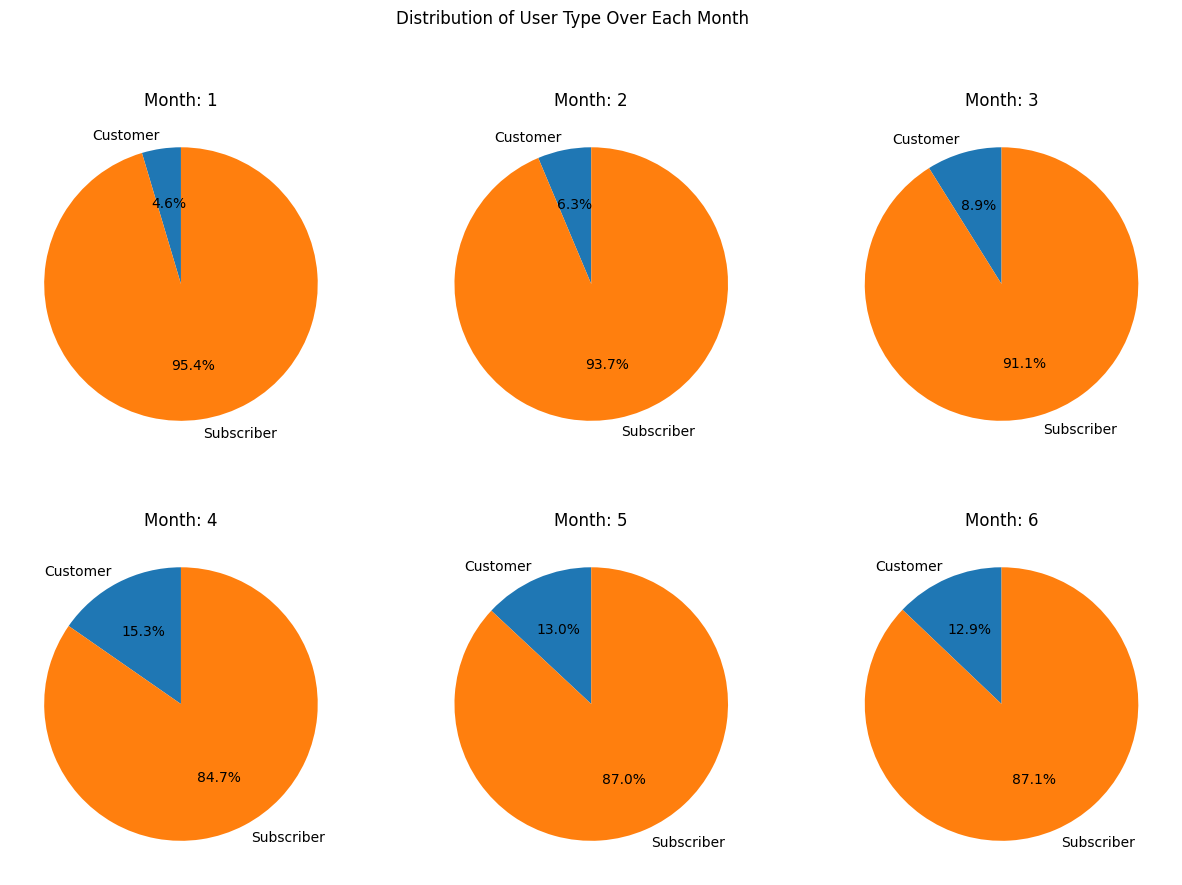

In [42]:
merged_df['month'] = merged_df['DATE'].dt.month # extract the month from the date

#Group by month and user_type to get counts
user_type_distribution = merged_df.groupby(['month', 'user_type']).size().unstack()

#pie charts for each month
months = user_type_distribution.index
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, month in enumerate(months):
    ax = axs[i // 3, i % 3]
    data = user_type_distribution.loc[month]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Month: {month}')

plt.suptitle('Distribution of User Type Over Each Month')
plt.show()

Here is the visualization of the relations between the trip duration average, user types, and snowfall values. 
This visualization below indicates that customers average duration peak is when there is no snow fall i.e. snow condition = 0, and the subscribers average duration peak is when there is snowfall equals 4.

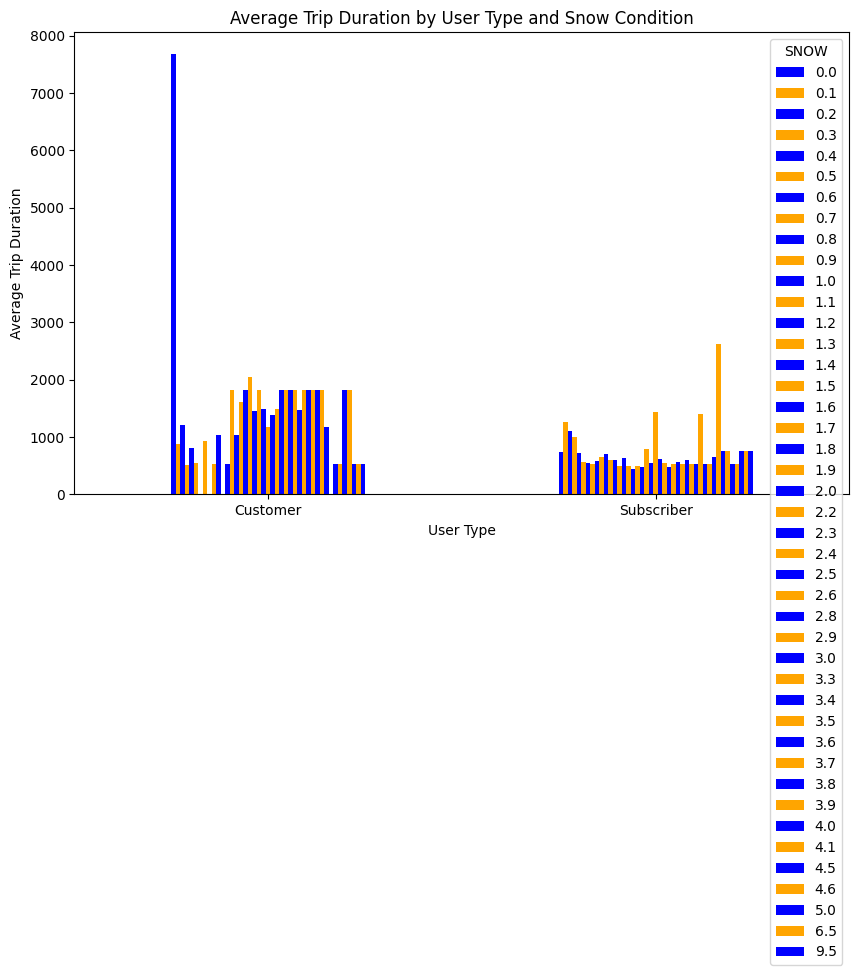

In [43]:
#Groupe Bar Chart of trip duration by user type and snow condition
avg_trip_duration_by_type_snow = merged_df.groupby(['user_type', 'SNOW'])['trip_duration'].mean().unstack()

avg_trip_duration_by_type_snow.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by User Type and Snow Condition')
plt.xticks(rotation=0)
plt.show()

Here the start station latitude is studied with the amount of snowfall, it can be seen that most conditions are with 0-1 snowfall values.
For the start station logitude it can be seen that most conditions are with 0-2 snowfall values.

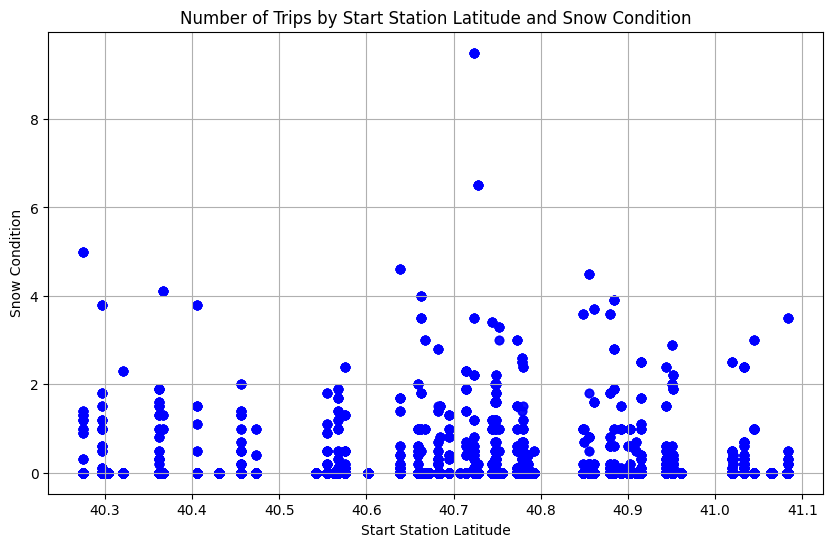

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['start_station_latitude_y'], merged_df['SNOW'], alpha=0.5, c='blue')
plt.xlabel('Start Station Latitude')
plt.ylabel('Snow Condition')
plt.title('Number of Trips by Start Station Latitude and Snow Condition')
plt.grid(True)
plt.show()

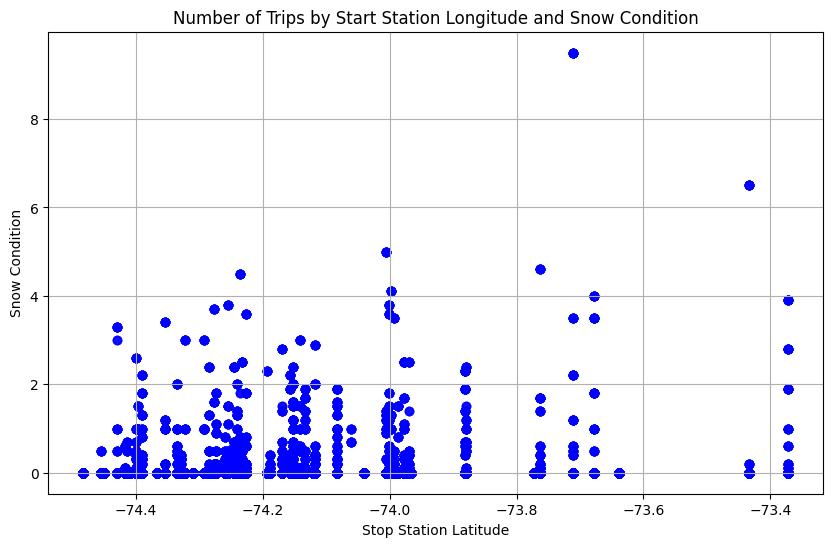

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['start_station_longitude_y'], merged_df['SNOW'], alpha=0.5, c='blue')
plt.xlabel('Stop Station Latitude')
plt.ylabel('Snow Condition')
plt.title('Number of Trips by Start Station Longitude and Snow Condition')
plt.grid(True)
plt.show()

*Research question 2:* How are the number of bike rides distributed per month? and what is the maximum ride trip duration is each month?

The distribution below shows that the maximum rides counts are in January, followed by February, followed by April, June, March, and May.

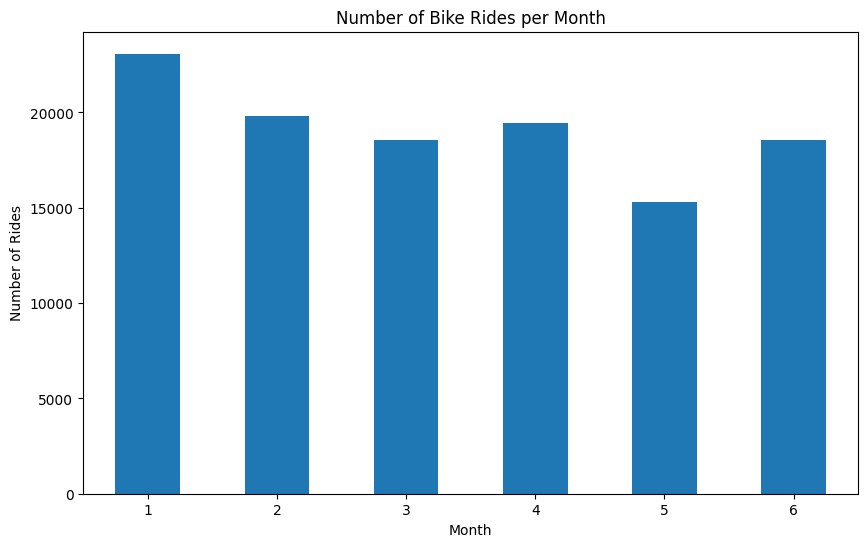

In [46]:
merged_df['month'] = merged_df['DATE'].dt.month
#this figure shows a bar chart of the rides oer months from January to June
plt.figure(figsize=(10, 6))
merged_df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Bike Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.show()

The visualization below answers the second part of the second research question. This bar chart indicates that the most trip duration found in April.

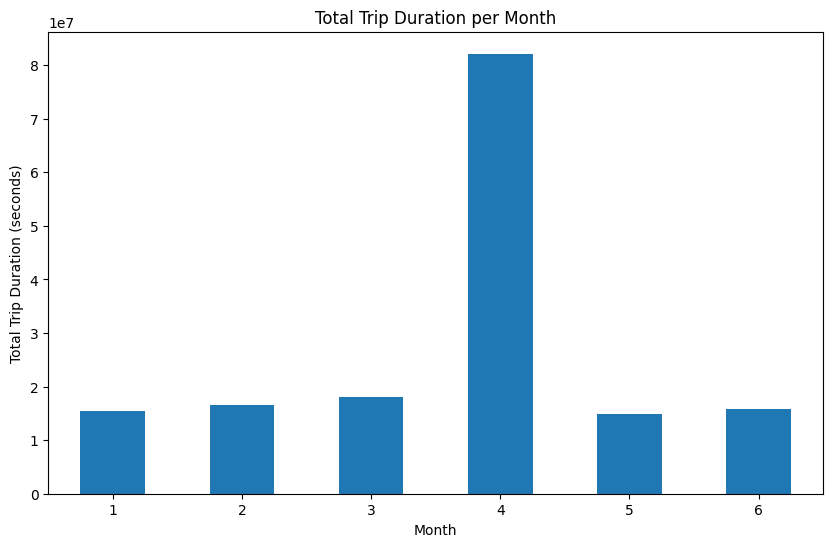

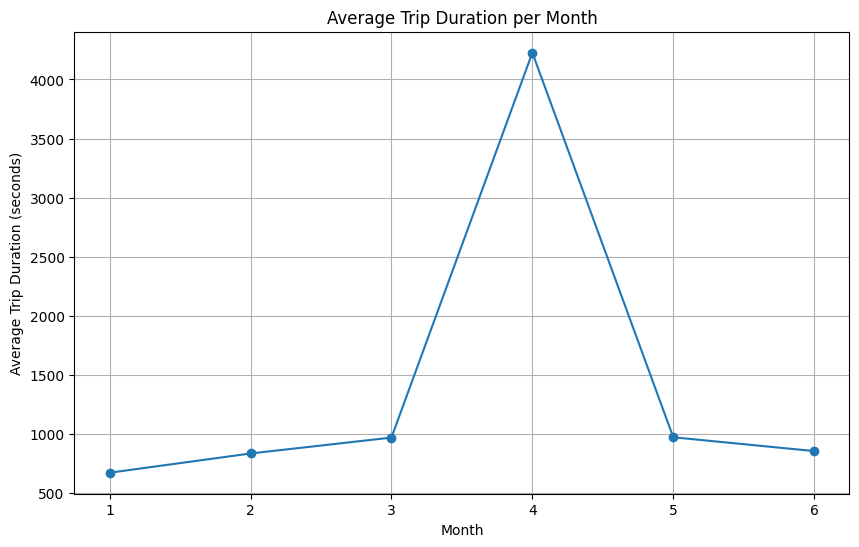

In [47]:
#plotting the bar chart of month and trip duration
merged_df['month'] = merged_df['DATE'].dt.month
plt.figure(figsize=(10, 6))
merged_df.groupby('month')['trip_duration'].sum().plot(kind='bar')
plt.title('Total Trip Duration per Month')
plt.xlabel('Month')
plt.ylabel('Total Trip Duration (seconds)')
plt.xticks(rotation=0)
plt.show()

#plotting the line of month and trip duration
plt.figure(figsize=(10, 6))
merged_df.groupby('month')['trip_duration'].mean().plot(kind='line', marker='o')
plt.title('Average Trip Duration per Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(np.arange(1, 7, step=1))
plt.grid(True)
plt.show()


Additional Research question: How does precipitation affect bike ride duration in New York City during the first half of 2016?

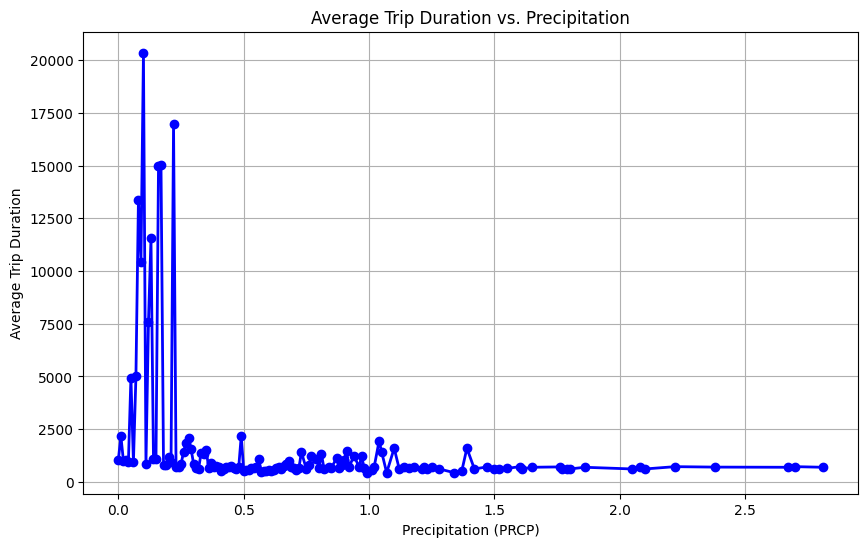

In [48]:
avg_trip_duration = merged_df.groupby('PRCP')['trip_duration'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_trip_duration.index, avg_trip_duration.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Average Trip Duration vs. Precipitation')
plt.xlabel('Precipitation (PRCP)')
plt.ylabel('Average Trip Duration')
plt.grid(True)
plt.show()


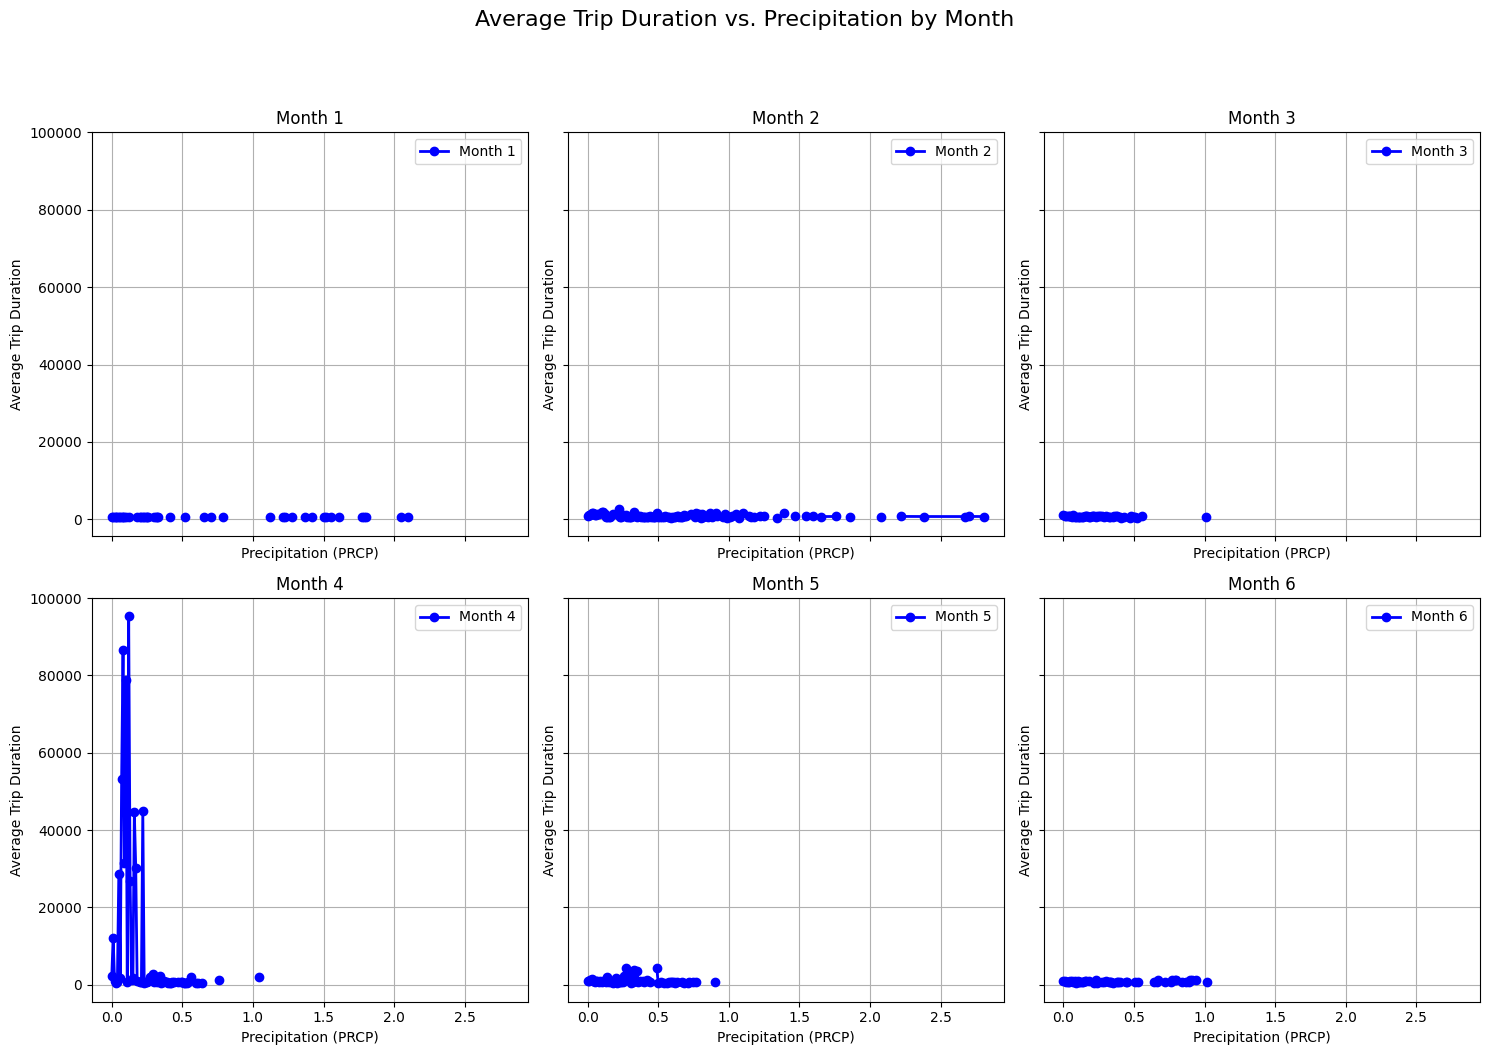

In [49]:
merged_df['month'] = merged_df['DATE'].dt.month
avg_trip_duration_monthly = merged_df.groupby(['month', 'PRCP'])['trip_duration'].mean().unstack()

fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

months = range(1, 7) 
axs = axs.flatten()
for i, month in enumerate(months):
    ax = axs[i]
    ax.plot(avg_trip_duration_monthly.columns, avg_trip_duration_monthly.loc[month], marker='o', linestyle='-', linewidth=2, label=f'Month {month}', color='blue')
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Precipitation (PRCP)')
    ax.set_ylabel('Average Trip Duration')
    ax.grid(True)
    ax.legend()
plt.suptitle('Average Trip Duration vs. Precipitation by Month', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

*Answer to research question:* It can be seen that the average trip durations can be seen to have a peak at around 0.01 percipitation percentage followed by 0.25. Also I specified for each month, April is the one with most count of trip durations, but approximately all of them are centered around 0-1.0 percipitation in each month. 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

If I had more time, I would be studying each dataset on its own more, analyzing the weather dataset and attributes and frequecy and correlations among each other, same for the bikeshare data. Then based on that certain study, I would choose the correct columns to marge and analyze the relation between the weather and bikeshare rental process. 
Then for the merged dataset I would make sure to include all the logical relations. 
I would search for more unrealistic data values in each column because maybe there are no nan values but hidden in different values. I would focus more on the outliers and make sure to protect the data from them and study their affect on the analysis. 

I have other research questions:
1- Is there a noticeable change in average trip duration as snow fall vary? Does this impact differ significantly between customers and subscribers?
2- Does high percipitations percentage discourage certain user types from using bike-sharing services more than others? (compare the subscribers and customers)
3- How do bike usage patterns change across seasons spring, summer, fall, winter in response to varying weather conditions? (but here I need to expand the dataset to include more months or compare winter with spring only)
